# Лекция 8. Использование библиотеки Pandas

Сегодня мы с вами поговорим про еще одну важную библиотеку, которую применяют для анализа данных – Pandas. Она тоже написана на языке C и имеет удобный интерфейс для использования в Python, а значит, работает очень быстро. Pandas очень удобно применять для работы с разного рода табличными данными, о которых мы в основном сегодня и будем говорить. Но сначала маленькое отступление.

## Установка

Если Pandas у вас не установлен, его необходимо установить (thank you, Cap!). Делается это через терминал (как в него попасть, мы уже говорили на прошлых лекциях). Для установки необходимо написать следующее:

```
pip3 install pandas
```

...и дождаться окончания установки.

## Табличные данные

Ну, а теперь к делу. Ранее мы с вами в основном работали с одномерными структурами данных – списки, кортежи, словари и массивы Numpy. Однако данные зачастую бывают представлены в виде таблиц (ну вспомните хотя бы таблицы Excel), и обрабатывать как правило приходится именно таблицы.

Вообще говоря, создать в Python таблицу несложно. Для этого мы можем использовать двумерные списки (списки списков).

In [1]:
my_table = [
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
]

Например, вот так – здесь списки выступают строками, а элементы списков с одинаковыми индексами – столбцами. Благодаря тому, что Python – высокоуровневый язык с _динамической типизацией_, мы можем положить в список элементы разных типов, поэтому без труда сможем добавить и описание столбцов.

In [2]:
my_table.insert(0, ['Column A', 'Column B', 'Column C'])
my_table

[['Column A', 'Column B', 'Column C'], [1, 2, 3], [4, 5, 6], [7, 8, 9]]

Можем обратиться к нашей таблице и получить какую-нибудь строку...

In [3]:
my_table[1]

[1, 2, 3]

...или какую-то конкретную ячейку. Например, ячейку во второй строке второй столбца:

In [4]:
my_table[1][1]

2

_А теперь попробуйте получить не строку, а столбец. Это, конечно, не проблема, но придется написать для этого специальный код._

Да, мы можем работать с таблицами таким образом, но честно говоря, это не очень-то удобно и можно легко совершить ошибку. Особенно, если представить, что в таблице не 3 столбца и 3 строки, а хотя бы 100. Есть и еще один момент – при работе с большим количеством данных, наш код с "родными" питоновскими структурами данных будет выполняться довольно медленно.

Именно поэтому мы с вами будем использовать Pandas.

## Структуры данных в Pandas: серии и датафреймы

Библиотека Pandas предоставляет нам возможность работать с данными, у которых есть _несколько измерений_. 

Например, для одномерных данных мы можем использовать серии (Series), для двухмерных – датафреймы (Dataframe), а для трехмерных – панели (Panel). Мы с вами близко познакомимся именно с датафреймами, потому что это та структура данных, которая позволяет нам удобно работать с таблицами. Но и про серии тоже немного поговорим.

Сначала давайте импортируем Pandas.

In [5]:
import pandas as pd

Если у вас в этом месте возникла ошибка, значит у вас не установлен Pandas – смотрите пункт **Установка**.

### Пару слов о Series

Пару слов про серии. Серии очень похожи на обычные питоновские списки или на массивы Numpy – набор каких-то упорядоченных элементов, у которых есть индексы.

Создать серию можно, просто передав ей список.

In [8]:
s = pd.Series([1, 2, 3, 4, 5, 100])

s

0      1
1      2
2      3
3      4
4      5
5    100
dtype: int64

Циферки слева – индексы. Циферки справа – значения. Все как у обычных списков. Разница лишь в том, что индексами тут могут быть _не только цифры_. То есть у серии ключом может быть, например, строка. Это уже что-то более похожее на _словарь_, в котором данные хранятся в виде _ключей и значений_.

Можно сразу создать серию с ключами в виде строк.

In [11]:
s = pd.Series([1, 2, 3, 4, 5], index=['A', 'B', 'C', 'D', 'E'])

s

A    1
B    2
C    3
D    4
E    5
dtype: int64

In [12]:
len(s)

5

Несмотря на то, что ключи у нас являются строками, получить значение можно и по _настоящему цифровому индексу – он никуда не делся_.

In [13]:
s[0]

1

На самом деле для работы с одномерными данными нам вполне достаточно обычных списков или же массивов Numpy. Но знать, что такая структура данных как Series в Pandas существует нужно. Более детально о ней можно почитать в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series). Мы же далее более подробно будем говорить про Dataframe.

### Dataframe

Датафреймы, как я уже сказал выше, это удобный инструмент для работы с двухмерными данными, то есть с табличками.

В самом начале лекции мы с вами делали таблицу из обычных питоновских списков. Давайте теперь перенесем ее в Pandas Dataframe.

In [14]:
table = [
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
]

df = pd.DataFrame(table)

In [15]:
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


Выглядит гораздо симпатичнее :)

_Обратите внимание – выделенными полужирным цифры сверху и слева показаны номера столбцов и строк таблицы. Поскольку мы их никак специально не задавали, они по-умолчанию стали цифрами._

Давайте обратимся к первому столбцу таблицы:

In [16]:
df[0]

0    1
1    4
2    7
Name: 0, dtype: int64

Собственно, данные первого столбца нашей таблицы как раз упакованы в ту самую серию, у которой мы говорили выше.

А вот так можно получить первую строку таблицы (нужно использовать специальный атрибут `loc`):

In [17]:
df.loc[0]

0    1
1    2
2    3
Name: 0, dtype: int64

Но давайте поработаем с чем-то более осмысленным. Например, создадим вот такую простеньку табличку с данными метеорологических наблюдений.

In [324]:
# делаем список с данными
table = [
    ['Moscow', 10.5, 45, 0],
    ['Saint Petersburg', 7.3, 68, 1.2],
    ['Vladivostok', 15.1, 57, 3.5],
]

# создаем датафрейм
df = pd.DataFrame(table)

In [325]:
df

,0,1,2,3
0,Moscow,10.5,45,0.0
1,Saint Petersburg,7.3,68,1.2
2,Vladivostok,15.1,57,3.5


Все так, но что же скрывается за этими загадочными цифрами? Давайте сделаем нормальные и понятные названия столбцов.

In [326]:
# указываем названия столбцов
df.columns = ['City', 'Temperature', 'Humidity', 'Precipitation']
df

,City,Temperature,Humidity,Precipitation
0,Moscow,10.5,45,0.0
1,Saint Petersburg,7.3,68,1.2
2,Vladivostok,15.1,57,3.5


Так гораздо лучше, но хорошо бы _индексами строк_ – там где сейчас `0,1,2` сделать названия городов. И так сделать можно с помощью метода `.set_index(column_name)`, который принимает название колонки, которую мы хотим сделать индексом.

Еще можно сразу при создании датафрейма передать параметр `index_col`.

_Удалить индекс можно с помощью метода `reset_index(...)`_.

In [327]:
df = df.set_index('City')
df

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,0.0
Saint Petersburg,7.3,68,1.2
Vladivostok,15.1,57,3.5


Теперь мы можем удобно обращаться к столбцам и колонкам. Например, мы хотим посмотреть, все данные по Москве:

In [328]:
df.loc['Moscow']

Temperature      10.5
Humidity         45.0
Precipitation     0.0
Name: Moscow, dtype: float64

...или получить все данные по осадкам (то есть по столбцу):

In [329]:
df['Precipitation']

City
Moscow              0.0
Saint Petersburg    1.2
Vladivostok         3.5
Name: Precipitation, dtype: float64

Кстати, Pandas позволяет обращаться к столбцам без скобок, вот так:

In [330]:
df.Temperature

City
Moscow              10.5
Saint Petersburg     7.3
Vladivostok         15.1
Name: Temperature, dtype: float64

_Но лучше так не делать, потому что так работает только в том случае, если название вашего столбца это одно слово. Если бы столбец назывался, например, не `Temperature`, а `Temperature, C`, то такое обращение уже вызвало бы ошибку_.

Мы можем получить данные по осадкам в Москве, то есть обратиться к _конкретной ячейке таблицы_:

In [331]:
df.at['Moscow', 'Precipitation']

0.0

А еще можем переопределить значение этой ячейки:

In [332]:
df.at['Moscow', 'Precipitation'] = 15.0
df

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0
Saint Petersburg,7.3,68,1.2
Vladivostok,15.1,57,3.5


Кстати, об индексах – мы всегда можем проверить, какие у нашего датафрейма индексы с помощью специального метода:

In [333]:
df.index

Index(['Moscow', 'Saint Petersburg', 'Vladivostok'], dtype='object', name='City')

И какие колонки тоже

In [334]:
df.columns

Index(['Temperature', 'Humidity', 'Precipitation'], dtype='object')

### Срезы и сложности синтаксиса

Как мы уже знаем, если мы напишем просто квадратные скобки после названия датафрейма, то получим колонку:

In [335]:
df['Temperature']

City
Moscow              10.5
Saint Petersburg     7.3
Vladivostok         15.1
Name: Temperature, dtype: float64

А вот если мы передадим туда два _индексных (числовых)_ значения через двоеточие, то получим срез в виде нового датафрейма. Правила те же, что и в срезах у списков – левая граница включается, а правая нет:

In [336]:
df[0:2]

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0
Saint Petersburg,7.3,68,1.2


Еще срезы можно делать не по номерам строк, а по именам. И в этом случае обе границы будут включающими :)

Что поделать, это просто придется запомнить:

In [337]:
df['Moscow':'Saint Petersburg']

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0
Saint Petersburg,7.3,68,1.2


Есть еще вот такой способ, позволяющий получить весь столбец в виде нового Dataframe. Обратите внимание, что запись вида `df['Temperature']`, которую мы делали выше, возврвщает нам данные столбца в виде Series. А запись вида `df[:'Temperature']`, когда мы используем срез, – новый Dataframe.

In [338]:
df[:'Temperature']

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0
Saint Petersburg,7.3,68,1.2


In [339]:
df['Temperature']

City
Moscow              10.5
Saint Petersburg     7.3
Vladivostok         15.1
Name: Temperature, dtype: float64

Со строками это, кстати, тоже работает:

In [340]:
df.loc[:'Moscow']

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0


In [341]:
df.loc['Moscow']

Temperature      10.5
Humidity         45.0
Precipitation    15.0
Name: Moscow, dtype: float64

### Обращение по имени и по индексу: `loc` и `iloc` / `at` и `iat`

Мы уже поняли, что запись `df.loc['name']` позволяет нам обращаться к строкам таблицы по именам. Однако, если вы вдруг захотите обратиться к N-ой строке этой таблицы, использование `loc` выдаст ошибку. 

In [113]:
df.loc[1]

KeyError: 1

Python в данном случае ожидает, что мы передадим именно _ключ_, но такого ключа в нашем датафрейме нет. Чтобы обратиться к строке по ее индексу (номеру), нужно использовать `iloc`:

In [114]:
df.iloc[1]

Temperature       7.3
Humidity         68.0
Precipitation     1.2
Name: Saint Petersburg, dtype: float64

In [115]:
df.iloc[:1]

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0


In [117]:
df.iloc[1:]

,Temperature,Humidity,Precipitation
City,,,
Saint Petersburg,7.3,68,1.2
Vladivostok,15.1,57,3.5


Аналогичным образом работает и обращение к ячейкам таблицы: `at` используется для обращения по именам:

In [122]:
df.at['Moscow', 'Temperature'] # данные в строке Moscow и колонке Temperature

10.5

И `iat` для обращения по индексам:

In [123]:
df.iat[0, 1] # данные в 1 строке  (индекс 0) и 2 колонке (индекс 1)

45

In [124]:
df.iat[2, 0] # данные в 3 строке (индекс 2) и 1 колонке (индекс 1)

15.1

### Выбор по условию

Помните, как мы выбирали элементы из массива Numpy по каким-то условиям? С датафреймами можно делать то же самое только для ячеек. Например, вот так мы можем выбрать все строки, где температура больше 10 градусов:

In [140]:
df[df['Temperature']> 10]

,Temperature,Humidity,Precipitation
City,,,
Moscow,10.5,45,15.0
Vladivostok,15.1,57,3.5


### Статистические операции

Pandas – мощный инструмент именно для статистического анализа данных. Поэтому он умеет расчитывать для датафреймов различные статистические показатели.

Например, вот так мы можем найти среднюю температуру среди трех представленных в нашей таблице городов (пример лишен реального смысла – никому не нужна средняя температура между Москвой, Питером и Владивостоком, он показывает лишь возможности используемого нами инструмента):

In [125]:
df['Temperature'].mean() # среднее значение по колонке Temperature

10.966666666666667

In [127]:
df['Temperature'].max() # максимальное значение по колонке Temperature

15.1

Еще можем найти, например, медиану:

In [128]:
df['Temperature'].median() # медианное значение по колонке Temperature

10.5

...или моду. Правда для этого, давайте сперва добавим в наш датафрейм еще одну ячейку, чтобы у нас было два однаковых значения температуры.

In [132]:
df1 = df.append({"Temperature": 10.5, "Humidity": 25, "Precipitation": 2.5}, ignore_index = True)
df1.index = ['Moscow', 'Saint Petersburg', 'Vladivostok', 'Sochi']
df1

,Temperature,Humidity,Precipitation
Moscow,10.5,45.0,15.0
Saint Petersburg,7.3,68.0,1.2
Vladivostok,15.1,57.0,3.5
Sochi,10.5,25.0,2.5


In [133]:
df1['Temperature'].mode() # теперь можем посчитать моду по колонке Temperature

0    10.5
dtype: float64

Вообще говоря, можно применять статистические методы вообще ко всему датафрейму. Тогда в ответ мы получим новый датафрейм с рассчитанными показателями для каждой колонки:

In [134]:
df1.mode()

,Temperature,Humidity,Precipitation
0,10.5,25.0,1.2
1,NaN,45.0,2.5
2,NaN,57.0,3.5
3,NaN,68.0,15.0


...а в некоторых случаях (когда значения не двухмерные) – серию:

In [135]:
df.max()

Temperature      15.1
Humidity         68.0
Precipitation    15.0
dtype: float64

In [136]:
df.median()

Temperature      10.5
Humidity         57.0
Precipitation     3.5
dtype: float64

In [137]:
df.mean()

Temperature      10.966667
Humidity         56.666667
Precipitation     6.566667
dtype: float64

### Реальные данные

Смотреть на табличку из цифр, конечно, прикольно, но все же работать с реальными данными интереснее. Так что давайте загрузим [вот этот](https://raw.githubusercontent.com/ekostogorov/hse_datajournalism/master/data/twitter.csv) датасет с информацией о твиттерах американских политиков.

В пакете Pandas есть множество классных функций, которые умеют строить датафрейм из разных файлов – например, `csv` или `excel`. Что такое `csv` мы с вами уже говорили, но если не помните, почитайте [тут](https://ru.wikipedia.org/wiki/CSV).

Например, вот так легко и просто можно считать `csv` файл и превратить его в датафрейм. При этом в аргументах мы можем передать как путь к файлу на вашем компьютере, так и ссылку, крутота!

In [342]:
df = pd.read_csv('https://raw.githubusercontent.com/ekostogorov/hse_datajournalism/master/data/twitter.csv')
df.head()

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
0,A. Donald McEachin,RepMcEachin,2017-01-03T00:00:00Z,816181091673448448,male,Germany,1961-10-10T00:00:00Z,59.0,repmceachin,Democratic Party
1,Aaron Michlewitz,RepMichlewitz,2010-06-27T00:00:00Z,160246973,male,United States of America,1978-01-01T00:00:00Z,42.0,NaN,Democratic Party
2,Aaron Peskin,AaronPeskin,2010-11-13T00:00:00Z,215369273,male,United States of America,1964-06-17T00:00:00Z,56.0,apeskin52,Democratic Party
3,Aaron Peña,AaronPena,2007-10-31T00:00:00Z,9843332,male,United States of America,1959-06-08T00:00:00Z,61.0,NaN,Republican Party
4,Aaron Schock,aaronschock,2009-03-12T00:00:00Z,23951197,male,United States of America,1981-05-28T00:00:00Z,39.0,aaronschock,Republican Party


In [343]:
list(df.columns)

['Name',
 'Twitter_username',
 'Account_start_time',
 'Account_ID',
 'Sex',
 'Birthplace',
 'Birthday',
 'Age',
 'Instagram_username',
 'Political_party']

In [344]:
len(df)

2514

Любая работа с данными начинается с их оценки, давайте посмотрим, что же у нас есть. А есть у нас табличка со следующими колонками: имя политика, его юзернейм в твиттере, дата и время, когда аккаунт был зарегистрирован, ID аккаунта, пол, место рождения, возраст, юзернейм в инстаграме и название политической партии, к которой он принадлежит.

Всего – 2514 строк.

Данные редко бывают чистыми и готовыми к работе сразу. Сначала нужно оценить их на предмет отсутствия какой-то информации или наоборот ее дублирования. Частенько в таблицах встречаются дубли – строки с одинаковыми значениями. Чтобы проверить, есть ли они у нас, мы можем вызвать специальный метод `duplicated`, передав ему имя колонки, по которой мы хотим искать дубликаты.

In [351]:
df.duplicated(subset='Twitter_username')

0       False
1       False
2       False
3       False
4       False
        ...  
2509     True
2510    False
2511    False
2512    False
2513    False
Length: 2514, dtype: bool

Дубликаты действительно есть. Давай отсортируем наш датафрейм, чтобы посомтреть на них.

In [352]:
df.sort_values(by=['Twitter_username'], ascending=True) # сортируем по колонке Twitter_username по возрастанию (ascending)

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1818,Niger Innis,3568ni,NaN,NaN,male,United States of America,1968-01-01T00:00:00Z,52.0,NaN,Republican Party
2497,Xavier Becerra,AGBecerra,NaN,NaN,male,United States of America,1958-01-26T00:00:00Z,62.0,repbecerra,Democratic Party
2498,Xavier Becerra,AGBecerra,NaN,NaN,male,United States of America,1958-01-26T00:00:00Z,62.0,repbecerra,Democratic Party
2496,Xavier Becerra,AGBecerra,NaN,NaN,male,United States of America,1958-01-26T00:00:00Z,62.0,repbecerra,Democratic Party
702,Doug Peterson,AGDougPeterson,2015-01-07T00:00:00Z,2963960540,male,United States of America,1959-01-01T00:00:00Z,61.0,NaN,Republican Party
...,...,...,...,...,...,...,...,...,...,...
613,David Yancey,yancey4delegate,2017-08-07T00:00:00Z,894689892134944768,male,United States of America,1972-04-06T00:00:00Z,48.0,NaN,Republican Party
1067,Jeff Yarbro,yarbro,NaN,NaN,male,United States of America,1977-02-16T00:00:00Z,43.0,NaN,Democratic Party
2510,Yvette Herrell,yvette4congress,2017-08-19T00:00:00Z,898787903609765890,female,United States of America,1964-03-16T00:00:00Z,56.0,NaN,Republican Party
2511,Zephyr Teachout,zephyrteachout,2008-07-17T00:00:00Z,15467700,female,United States of America,1971-10-24T00:00:00Z,49.0,zephyrteachout,Democratic Party


Вот они: посмотрите, например, на строки с пользователем AGBecerra. 

_Обратите внимание, что сортировка не всегда помогает вам с первого раза увидеть дубликаты, ведь они могут быть в середине датафрйема. Так что используйте именно метод `dublicated()`, чтобы убедиться в их присутстствии или отсутствии._

От дублей нам необходимо избавляться, иначе они помешают в расчетах. И хорошо, что в Pandas есть для этого специальная функция `drop_duplicates().`

В аргументах она принимает `subset` – название поля, по которому искать дубли (или список таких полей), `keep` – способ дедупликации (`first` будет означать, что нам нужно удалить все дублирующиеся записи, кроме первой), `inplace` – показывает, нужно ли удалить дубли из текущего датайрейма или создать новый. Мы перенесем данные в новый датафрейм, поэтому там `False`.

In [369]:
filtered_df = df.drop_duplicates(subset='Twitter_username', keep='first', inplace=False)

In [370]:
filtered_df.sort_values(by=['Twitter_username'], ascending=True) # сортируем по колонке Twitter_username по возрастанию (ascending)

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1818,Niger Innis,3568ni,NaN,NaN,male,United States of America,1968-01-01T00:00:00Z,52.0,NaN,Republican Party
2496,Xavier Becerra,AGBecerra,NaN,NaN,male,United States of America,1958-01-26T00:00:00Z,62.0,repbecerra,Democratic Party
702,Doug Peterson,AGDougPeterson,2015-01-07T00:00:00Z,2963960540,male,United States of America,1959-01-01T00:00:00Z,61.0,NaN,Republican Party
44,Alexandria Ocasio-Cortez,AOC,2018-12-29T00:00:00Z,1079104563280527364,female,United States of America,1989-10-13T00:00:00Z,31.0,aoc,Democratic Party
148,Austin Petersen,AP4Liberty,NaN,NaN,male,United States of America,1981-02-19T00:00:00Z,39.0,ap4liberty,Republican Party
...,...,...,...,...,...,...,...,...,...,...
613,David Yancey,yancey4delegate,2017-08-07T00:00:00Z,894689892134944768,male,United States of America,1972-04-06T00:00:00Z,48.0,NaN,Republican Party
1067,Jeff Yarbro,yarbro,NaN,NaN,male,United States of America,1977-02-16T00:00:00Z,43.0,NaN,Democratic Party
2510,Yvette Herrell,yvette4congress,2017-08-19T00:00:00Z,898787903609765890,female,United States of America,1964-03-16T00:00:00Z,56.0,NaN,Republican Party
2511,Zephyr Teachout,zephyrteachout,2008-07-17T00:00:00Z,15467700,female,United States of America,1971-10-24T00:00:00Z,49.0,zephyrteachout,Democratic Party


Ну вот, так уже лучше.

Теперь можем оценить политиков-твиттероводов по возрасту. Например, давайте выясним, сколько лет самому младшему и самому старшему. А еще найдем средний возраст и моду.

In [371]:
filtered_df['Age'].min()

18.0

In [372]:
filtered_df['Age'].max()

119.0

Хммм... у нас явно есть долгожитель. Но скорее всего просто данные грязные. Давайте отсортируем наш датафрейм по колонке `Age` и посмотрим на самых старших представителей.

In [374]:
filtered_df.sort_values(by='Age', ascending=True)

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1799,Nate Tinbite,natetinbite,2016-05-04T00:00:00Z,727970917008158720,male,United States of America,2002-05-09T00:00:00Z,18.0,natetinbite,Democratic Party
1491,Lorraine Cortés-Vázquez,LorraineCortesV,2011-07-27T00:00:00Z,343513430,female,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1105,Jim Dabakis,JimDabakis,2011-03-22T00:00:00Z,270462608,male,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1528,Madison Cawthorn,CawthornforNC,NaN,NaN,male,United States of America,1995-08-01T00:00:00Z,25.0,NaN,Republican Party
996,James Allsup,realjamesallsup,NaN,NaN,male,United States of America,1995-09-07T00:00:00Z,25.0,NaN,Republican Party
...,...,...,...,...,...,...,...,...,...,...
2209,Stephanie Chang,stephanielily,2008-10-15T00:00:00Z,16785950,female,United States of America,NaN,NaN,NaN,Democratic Party
2215,Stephen L. Meredith,slmeredithky1,NaN,NaN,male,United States of America,NaN,NaN,NaN,Republican Party
2225,Steve Gaynor,realSteveGaynor,2017-10-11T00:00:00Z,917990859957817345,male,United States of America,NaN,NaN,NaN,Republican Party
2375,Tom Cochran,reptomcochran,NaN,NaN,male,United States of America,NaN,NaN,NaN,Democratic Party


Мы ожидали возраст, но вылез какой-то `NaN` :(

Не пугайтесь, `NaN` означает Not A Number – в этой числовой ячейке нет значения, поэтому Pandas расценивает его как нечисло. Нам такие данные для расчетов по возрасту не нужны. Давайте их удалим. Для этого в Pandas есть специальный метод `dropna()`, удаляющий отсутствующие значения.

In [376]:
cleaned_df = filtered_df.dropna(subset=['Age'], inplace=False)

In [383]:
cleaned_df = cleaned_df.sort_values(by='Age', ascending=True)
cleaned_df

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1799,Nate Tinbite,natetinbite,2016-05-04T00:00:00Z,727970917008158720,male,United States of America,2002-05-09T00:00:00Z,18.0,natetinbite,Democratic Party
1491,Lorraine Cortés-Vázquez,LorraineCortesV,2011-07-27T00:00:00Z,343513430,female,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1105,Jim Dabakis,JimDabakis,2011-03-22T00:00:00Z,270462608,male,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1528,Madison Cawthorn,CawthornforNC,NaN,NaN,male,United States of America,1995-08-01T00:00:00Z,25.0,NaN,Republican Party
996,James Allsup,realjamesallsup,NaN,NaN,male,United States of America,1995-09-07T00:00:00Z,25.0,NaN,Republican Party
...,...,...,...,...,...,...,...,...,...,...
735,Edwin Edwards,EdwinWEdwards,2014-02-27T00:00:00Z,2363378742,male,United States of America,1927-08-07T00:00:00Z,93.0,NaN,Democratic Party
1194,"John Dingell, Jr.",JohnDingell,2010-01-27T00:00:00Z,109025212,male,United States of America,1926-07-08T00:00:00Z,94.0,NaN,Democratic Party
721,Ed Koch,mayoredkoch,2010-05-13T00:00:00Z,143524116,male,United States of America,1924-12-12T00:00:00Z,95.0,NaN,Democratic Party
854,George H. W. Bush,GeorgeHWBush,2012-01-27T00:00:00Z,475988505,male,United States of America,1924-06-12T00:00:00Z,96.0,NaN,Republican Party


Ну вот, так лучше. Теперь мы видим, что в конце нашего датафрейма аж два 119-летних человека. На подозрение наводит то, что в соседней колонке с датой рождения мы видим `1901-01-01T00:00:00Z`. Скорее всего это означает, что такое значение вместо отсутствующего подставил тот, кто собирал этот датасет. Быстрое гугление человека по имени Elizabeth Guzmán подтверждает, что ей явно не 119 лет, а значит, наши данные ошибочны.

Давайте удалим из датафрейма всех, кто старше 100 лет.

In [384]:
cleaned_df = cleaned_df[cleaned_df['Age'] < 100]
cleaned_df

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1799,Nate Tinbite,natetinbite,2016-05-04T00:00:00Z,727970917008158720,male,United States of America,2002-05-09T00:00:00Z,18.0,natetinbite,Democratic Party
1491,Lorraine Cortés-Vázquez,LorraineCortesV,2011-07-27T00:00:00Z,343513430,female,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1105,Jim Dabakis,JimDabakis,2011-03-22T00:00:00Z,270462608,male,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1528,Madison Cawthorn,CawthornforNC,NaN,NaN,male,United States of America,1995-08-01T00:00:00Z,25.0,NaN,Republican Party
996,James Allsup,realjamesallsup,NaN,NaN,male,United States of America,1995-09-07T00:00:00Z,25.0,NaN,Republican Party
...,...,...,...,...,...,...,...,...,...,...
735,Edwin Edwards,EdwinWEdwards,2014-02-27T00:00:00Z,2363378742,male,United States of America,1927-08-07T00:00:00Z,93.0,NaN,Democratic Party
1194,"John Dingell, Jr.",JohnDingell,2010-01-27T00:00:00Z,109025212,male,United States of America,1926-07-08T00:00:00Z,94.0,NaN,Democratic Party
721,Ed Koch,mayoredkoch,2010-05-13T00:00:00Z,143524116,male,United States of America,1924-12-12T00:00:00Z,95.0,NaN,Democratic Party
854,George H. W. Bush,GeorgeHWBush,2012-01-27T00:00:00Z,475988505,male,United States of America,1924-06-12T00:00:00Z,96.0,NaN,Republican Party


Наконец-то можем посмотреть, какие-нибудь статистические показатели по нашему датафрейму!

In [385]:
cleaned_df['Age'].mean() # средний возраст

58.904712041884814

In [386]:
cleaned_df['Age'].mode() # мода возрастов

0    66.0
dtype: float64

Интересно, что учитывая наличие и 18-летнего политика, средний возвраст и мода – около 59 лет. Еще интересно, что эти два показателя довольно близки.

Можем даже нарисовать красивую гистограмму распределения по возрасту.

In [359]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

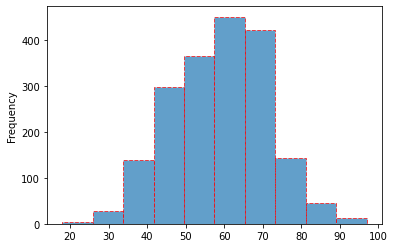

In [387]:
cleaned_df['Age'].plot.hist(**{'alpha':0.7,'ls':'--','linewidth':1,'edgecolor':'r'})

А теперь давайте выясним, кого среди них больше – мужчин или женщин?

In [388]:
len(cleaned_df[cleaned_df['Sex'] == 'male'])

1376

In [389]:
len(cleaned_df[cleaned_df['Sex'] == 'female'])

529

Что ж, в политике на данный момент наверное в принципе больше мужчин. А теперь давайте посмотрим, кого среди них больше – республиканцев или демократов?

In [390]:
len(cleaned_df[cleaned_df['Political_party'] == 'Democratic Party'])

951

In [391]:
len(cleaned_df[cleaned_df['Political_party'] == 'Republican Party'])

843

Оказывается, больше демократов.

Кстати, мы можем писать и более сложные запросы. Например, можем добавить еще одно условие и узнать, сколько женщин среди представителей демократической партии.

_Обратите внимание на круглые скобки, выделяющие условия и знак `&` – логическое И_.

In [392]:
cleaned_df[ (cleaned_df['Political_party'] == 'Democratic Party') & (cleaned_df['Sex'] == 'female')  ]

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1491,Lorraine Cortés-Vázquez,LorraineCortesV,2011-07-27T00:00:00Z,343513430,female,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
44,Alexandria Ocasio-Cortez,AOC,2018-12-29T00:00:00Z,1079104563280527364,female,United States of America,1989-10-13T00:00:00Z,31.0,aoc,Democratic Party
5,Abby Finkenauer,Abby4Iowa,2013-03-12T00:00:00Z,1262017122,female,United States of America,1988-12-27T00:00:00Z,31.0,abby4iowa,Democratic Party
1425,Kylie Oversen,KylieOversen,2012-07-02T00:00:00Z,624883838,female,United States of America,1989-03-02T00:00:00Z,31.0,kylie_oversen,Democratic Party
2334,Tiffany Cabán,CabanForQueens,NaN,NaN,female,United States of America,1988-01-01T00:00:00Z,32.0,cabanforqueens,Democratic Party
...,...,...,...,...,...,...,...,...,...,...
729,Eddie Bernice Johnson,RepEBJ,2010-07-19T00:00:00Z,168502762,female,United States of America,1935-12-03T00:00:00Z,84.0,repebj,Democratic Party
660,Dianne Feinstein,SenFeinstein,2012-01-27T00:00:00Z,476256944,female,United States of America,1933-06-22T00:00:00Z,87.0,NaN,Democratic Party
1526,Madeleine M. Kunin,MadeleineKunin,2012-01-16T00:00:00Z,465807944,female,Switzerland,1933-09-28T00:00:00Z,87.0,NaN,Democratic Party
1498,Louise Slaughter,louiseslaughter,2009-08-05T00:00:00Z,63169388,female,United States of America,1929-08-14T00:00:00Z,91.0,louisemslaughter,Democratic Party


Для сложных запросов в Pandas даже есть специальный метод `query`. Правда, удобство его использования остается под вопросом :)

In [393]:
cleaned_df.query('Political_party == "Democratic Party" and Sex == "female"')

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1491,Lorraine Cortés-Vázquez,LorraineCortesV,2011-07-27T00:00:00Z,343513430,female,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
44,Alexandria Ocasio-Cortez,AOC,2018-12-29T00:00:00Z,1079104563280527364,female,United States of America,1989-10-13T00:00:00Z,31.0,aoc,Democratic Party
5,Abby Finkenauer,Abby4Iowa,2013-03-12T00:00:00Z,1262017122,female,United States of America,1988-12-27T00:00:00Z,31.0,abby4iowa,Democratic Party
1425,Kylie Oversen,KylieOversen,2012-07-02T00:00:00Z,624883838,female,United States of America,1989-03-02T00:00:00Z,31.0,kylie_oversen,Democratic Party
2334,Tiffany Cabán,CabanForQueens,NaN,NaN,female,United States of America,1988-01-01T00:00:00Z,32.0,cabanforqueens,Democratic Party
...,...,...,...,...,...,...,...,...,...,...
729,Eddie Bernice Johnson,RepEBJ,2010-07-19T00:00:00Z,168502762,female,United States of America,1935-12-03T00:00:00Z,84.0,repebj,Democratic Party
660,Dianne Feinstein,SenFeinstein,2012-01-27T00:00:00Z,476256944,female,United States of America,1933-06-22T00:00:00Z,87.0,NaN,Democratic Party
1526,Madeleine M. Kunin,MadeleineKunin,2012-01-16T00:00:00Z,465807944,female,Switzerland,1933-09-28T00:00:00Z,87.0,NaN,Democratic Party
1498,Louise Slaughter,louiseslaughter,2009-08-05T00:00:00Z,63169388,female,United States of America,1929-08-14T00:00:00Z,91.0,louisemslaughter,Democratic Party


Еще мы могли бы проанализировать данные по полю – `Account_start_time` – времени, когда был заведен аккаунт. Однако данные в этой колонке на самом деле не совсем время – это строки. А значит, фильтровать и сортировать по этой колонке как по колонке с временем мы не можем...

In [395]:
print(cleaned_df.at[1, 'Account_start_time'])
type(cleaned_df.at[1, 'Account_start_time'])

2010-06-27T00:00:00Z


str

Это можно сделать с помощью специальной функции `to_datetime` из пакета Pandas. 

Хм, что прямо вот так? Без циклов и перебора всех значений?
Да! Такие операции в Pandas тоже выполняются поэлементно – примерно так же как в массивах Numpy. Здесь мы поэлементно привели все ячейки в колонке `Account_start_time` из строк в специальный объект `Timestamp`, в котором в Python хранится время.

In [396]:
cleaned_df['Account_start_time'] = pd.to_datetime(cleaned_df['Account_start_time'])
cleaned_df

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
1799,Nate Tinbite,natetinbite,2016-05-04 00:00:00+00:00,727970917008158720,male,United States of America,2002-05-09T00:00:00Z,18.0,natetinbite,Democratic Party
1491,Lorraine Cortés-Vázquez,LorraineCortesV,2011-07-27 00:00:00+00:00,343513430,female,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1105,Jim Dabakis,JimDabakis,2011-03-22 00:00:00+00:00,270462608,male,United States of America,2000-01-01T00:00:00Z,20.0,NaN,Democratic Party
1528,Madison Cawthorn,CawthornforNC,NaT,NaN,male,United States of America,1995-08-01T00:00:00Z,25.0,NaN,Republican Party
996,James Allsup,realjamesallsup,NaT,NaN,male,United States of America,1995-09-07T00:00:00Z,25.0,NaN,Republican Party
...,...,...,...,...,...,...,...,...,...,...
735,Edwin Edwards,EdwinWEdwards,2014-02-27 00:00:00+00:00,2363378742,male,United States of America,1927-08-07T00:00:00Z,93.0,NaN,Democratic Party
1194,"John Dingell, Jr.",JohnDingell,2010-01-27 00:00:00+00:00,109025212,male,United States of America,1926-07-08T00:00:00Z,94.0,NaN,Democratic Party
721,Ed Koch,mayoredkoch,2010-05-13 00:00:00+00:00,143524116,male,United States of America,1924-12-12T00:00:00Z,95.0,NaN,Democratic Party
854,George H. W. Bush,GeorgeHWBush,2012-01-27 00:00:00+00:00,475988505,male,United States of America,1924-06-12T00:00:00Z,96.0,NaN,Republican Party


И правда время!

In [397]:
cleaned_df.at[1, 'Account_start_time']

Timestamp('2010-06-27 00:00:00+0000', tz='UTC')

Ну, теперь можем посмотреть время регистрации первого и последнего аккаунта из нашей таблицы.

In [398]:
cleaned_df['Account_start_time'].min()

Timestamp('2007-03-01 00:00:00+0000', tz='UTC')

In [399]:
cleaned_df['Account_start_time'].max()

Timestamp('2020-08-17 00:00:00+0000', tz='UTC')

А можем и весь датафрейм отсортировать по этому полю, чтобы было удобнее смотреть.

In [400]:
cleaned_df = cleaned_df.sort_values(by=['Account_start_time'], ascending = True)
cleaned_df

,Name,Twitter_username,Account_start_time,Account_ID,Sex,Birthplace,Birthday,Age,Instagram_username,Political_party
934,Hans Riemer,hansriemer,2007-03-01 00:00:00+00:00,804295,male,United States of America,1972-09-05T00:00:00Z,48.0,NaN,Democratic Party
2131,Sarah Sanders,SHSanders45,2007-04-01 00:00:00+00:00,823693635564802048,female,United States of America,1982-08-13T00:00:00Z,38.0,NaN,Republican Party
2403,Tom Price,SecPriceMD,2007-06-01 00:00:00+00:00,6577802,male,United States of America,1954-10-08T00:00:00Z,66.0,secpricemd,Republican Party
2402,Tom Price,RepTomPrice,2007-06-01 00:00:00+00:00,6577802,male,United States of America,1954-10-08T00:00:00Z,66.0,secpricemd,Republican Party
1626,Matthew Whitaker,mattwhitaker46,2007-06-08 00:00:00+00:00,6672532,male,United States of America,1969-10-29T00:00:00Z,51.0,NaN,Republican Party
...,...,...,...,...,...,...,...,...,...,...
1850,Pat Roberts,SenPatRoberts,NaT,NaN,male,United States of America,1936-04-20T00:00:00Z,84.0,NaN,Republican Party
757,Elizabeth Dole,elizabethdole,NaT,NaN,female,United States of America,1936-07-29T00:00:00Z,84.0,NaN,Republican Party
357,Carl Levin,SenCarlLevin,NaT,NaN,male,United States of America,1934-06-28T00:00:00Z,86.0,NaN,Democratic Party
1972,Richard Lugar,senatorlugar,NaT,NaN,male,United States of America,1932-04-04T00:00:00Z,88.0,NaN,Republican Party


Оказывается, первым аккаунт в твиттере завел демократ Hans Riemer в 2007 году. Сколько ему было тогда лет? У нас есть дата рождения, и мы можем посчитать – 34 года.

В каком возрасте представители разных партий заводят твиттер? У кого из них есть аккаунт в инстаграм, а кто сидит только в твиттере? Кто из политиков заводит твиттер раньше – мучжины или женщины? На все эти вопросы можно ответить с помощью этого датасета – поразвлекайтесь на досуге.

А на этом на сегодня все!